## 朴素PageRank

In [13]:
import pandas as pd
import time
import matplotlib.pyplot as plt

# 1. 读取数据
df = pd.read_csv('web_links.csv')

# 2. 构建图结构
edges = list(zip(df['FromNodeId'], df['ToNodeId']))
nodes = sorted(set(df['FromNodeId']).union(set(df['ToNodeId'])))
N = len(nodes)

node_to_index = {node: idx for idx, node in enumerate(nodes)}
index_to_node = {idx: node for node, idx in node_to_index.items()}

# 3. 初始化图的出边信息
out_links = {i: [] for i in range(N)}
out_degree = [0] * N

for from_id, to_id in edges:
    u = node_to_index[from_id]
    v = node_to_index[to_id]
    out_links[u].append(v)
    out_degree[u] += 1

FileNotFoundError: [Errno 2] No such file or directory: 'web_links.csv'

In [11]:
# 4. 初始化 PageRank 向量
damping = 0.85
pr = [1.0 / N] * N
max_iterations = 100
epsilon = 1e-10
diff_list = []

# ✅ 开始计时
start_time = time.time()

# 5. PageRank 主循环（带收敛判断）
for iteration in range(max_iterations):
    new_pr = [0.0] * N
    dangling_sum = sum(pr[u] for u in range(N) if out_degree[u] == 0)

    for u in range(N):
        if out_degree[u] == 0:
            continue
        share = pr[u] / out_degree[u]
        for v in out_links[u]:
            new_pr[v] += damping * share

    for i in range(N):
        new_pr[i] += (1 - damping) / N
        new_pr[i] += damping * dangling_sum / N

    diff = sum(abs(new_pr[i] - pr[i]) for i in range(N))
    diff_list.append(diff)
    print(f"Iteration {iteration+1}, diff = {diff:.8f}")

    if diff < epsilon:
        print("Converged.")
        break

    pr = new_pr

# ✅ 结束计时
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime: {total_time:.2f} seconds")

Iteration 1, diff = 0.95790725
Iteration 2, diff = 0.49267780
Iteration 3, diff = 0.24389767
Iteration 4, diff = 0.12526351
Iteration 5, diff = 0.07264675
Iteration 6, diff = 0.04692311
Iteration 7, diff = 0.03269156
Iteration 8, diff = 0.02354667
Iteration 9, diff = 0.01751872
Iteration 10, diff = 0.01351175
Iteration 11, diff = 0.01057326
Iteration 12, diff = 0.00837425
Iteration 13, diff = 0.00669964
Iteration 14, diff = 0.00541124
Iteration 15, diff = 0.00438895
Iteration 16, diff = 0.00358076
Iteration 17, diff = 0.00292967
Iteration 18, diff = 0.00240797
Iteration 19, diff = 0.00198262
Iteration 20, diff = 0.00163803
Iteration 21, diff = 0.00135501
Iteration 22, diff = 0.00112359
Iteration 23, diff = 0.00093241
Iteration 24, diff = 0.00077545
Iteration 25, diff = 0.00064502
Iteration 26, diff = 0.00053785
Iteration 27, diff = 0.00044859
Iteration 28, diff = 0.00037478
Iteration 29, diff = 0.00031309
Iteration 30, diff = 0.00026194
Iteration 31, diff = 0.00021909
Iteration 32, dif

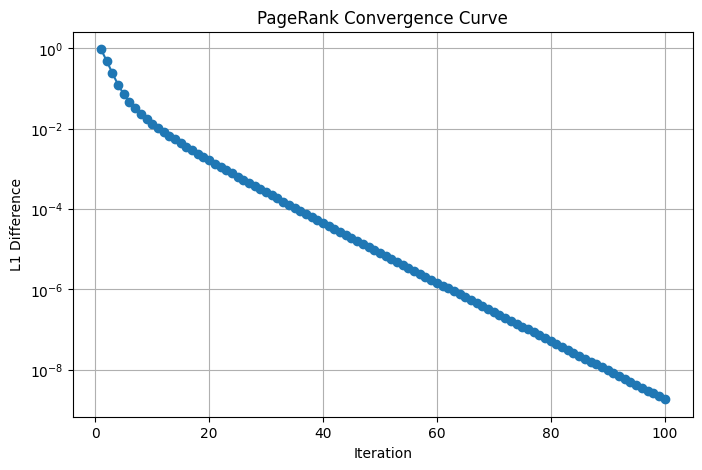

In [12]:
# 6. 排序并输出前1000
result = [(index_to_node[i], pr[i]) for i in range(N)]
result.sort(key=lambda x: x[1], reverse=True)
top1000 = result[:1000]

# 7. 保存为 test_prediction.csv
df_out = pd.DataFrame(top1000, columns=["NodeId", "PageRank_Value"])
df_out.to_csv("simple_method.csv", index=False)

# ✅ 8. 收敛曲线绘图
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(diff_list)+1), diff_list, marker='o')
plt.yscale('log')
plt.title("PageRank Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("L1 Difference")
plt.grid(True)
plt.savefig("convergence_curve.png")
plt.show()